# Predicting Healthcare Charges 

#### Chris Richards
#### Practicum 1, Summer 2020
#### Regis University


### Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"E:\Regis\Practicum_1\insurance.csv")
df_profile = df

### Begin EDA

In [4]:
df.shape

(1339, 7)

The data frame consists of 1,339 rows and 7 columns.  
  
##### Get stats on the quantitative features

In [5]:
df.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1338.000000
mean,39.251680,30.714432,1.168036,13270.422265
std,14.139445,6.375554,2.934409,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,99.000000,99.000000,99.000000,63770.428010


##### Get information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   sex       1339 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1339 non-null   int64  
 4   smoker    1339 non-null   object 
 5   region    1339 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


1,339 entries with one null entry in the charges feature.  Three of the features, sex, smoker, and region are categorical data types.

In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603
1338,99,male,99.00,99,yes,southwest,NaN


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Count Null Values

In [10]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()  

charges    1
dtype: int64

The "charges" column contains a null.  
  
Find the rows where the null occurs.

In [11]:
df[df["charges"].isnull()][null_columns]

,charges
1338,NaN


Returns the last row which is the test row that contains a null.
I'll remove the row with the null value.

In [12]:
df.dropna(inplace=True)

In [13]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum() 

Series([], dtype: float64)

The operation succeeded as the number of NAs is 0.  
Another way to check the count of null values which is easier to understand is shown.

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Pairs plot

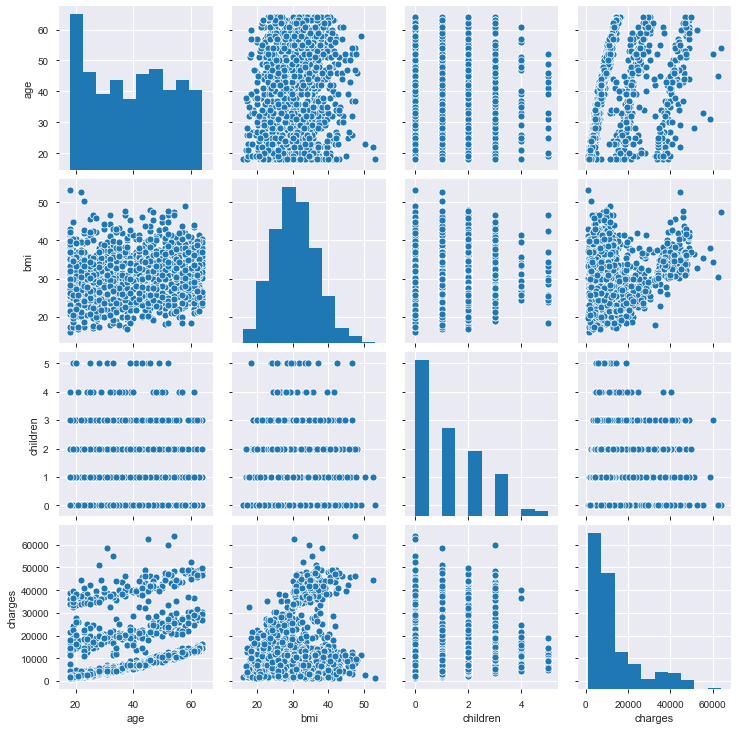

In [15]:
sns.pairplot(df)

#### Unique Values

In [16]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

None of the values contain a single value. Single value features do not contribute to a predictive model and would have been removed if found.  

#### Duplicate Rows

In [17]:
dupe_rows_df = df[df.duplicated()]
dupe_rows_df

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Observation 581 (row 583 in the file) is a duplicate of another row.  I'll find the other rows where the charge is the same amount as that number, 1639.5631, is likely not common in the file.

In [18]:
df[df["charges"] == 1639.5631] # select rows where charges are 1639.5631

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Rows 195 and 581 are duplicated.  I'll remove row 581, the second instance, by using the parameter keep='first' in the drop_duplicates method.

In [19]:
df.drop_duplicates(keep='first', inplace=True)

Check the operation

In [20]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


No duplicates are found.

Recheck the count of rows and columns.  
Two rows and no columns have been removed.  The original shape of the data frame was 1,339 rows and 7 columns.  The resulting data frame should have 1,337 rows and 7 columns.

In [21]:
df.count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
charges     1337
dtype: int64

#### Detecting Outliers

Visualization techniques will be used to identify outliers.  If found, outliers will be analyzed and dealt with on a case-by-case basis.

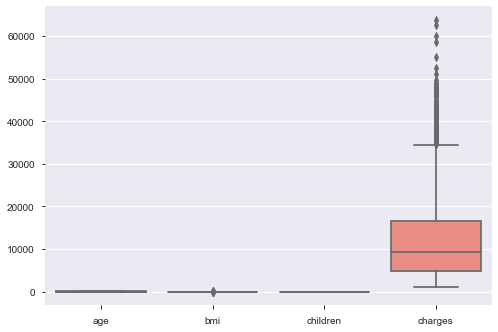

In [22]:
columns = df.columns.to_list()
sns.boxplot(data=df, orient="v", palette="Set3")

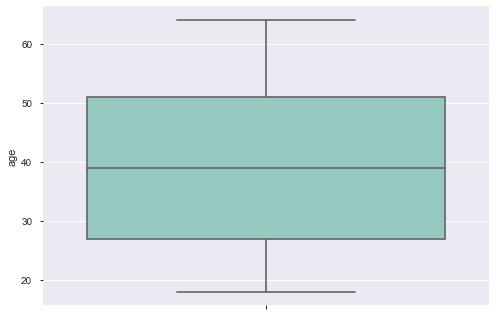

In [23]:
sns.boxplot(x=df['age'], orient="v", palette="Set3")

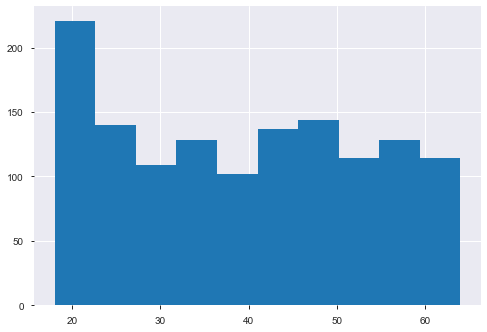

In [24]:
df['age'].hist()

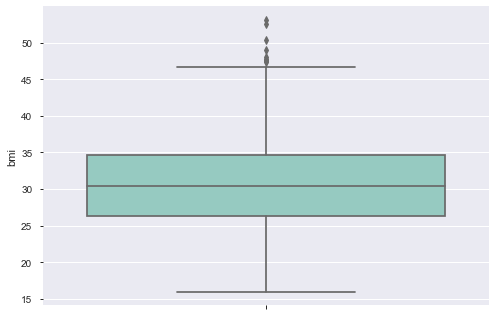

In [25]:
sns.boxplot(x=df['bmi'], orient="v", palette="Set3")

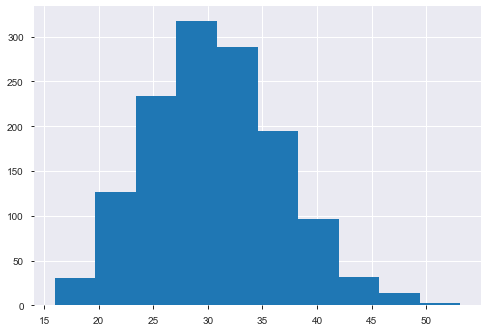

In [26]:
df['bmi'].hist()

Outliers are detected above a bmi of about 47.  A scatterplot will help visualize them.

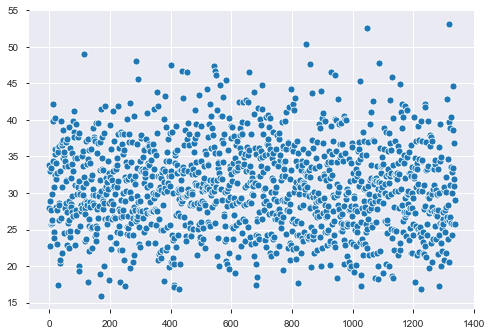

In [27]:
sns.scatterplot(data=df['bmi'])

In [28]:
outlier_bmi = df[df['bmi'] > 40]
outlier_bmi.sort_values('bmi', ascending = False).head(10)

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.46270
1047,22,male,52.58,1,yes,southeast,44501.39820
847,23,male,50.38,1,no,southeast,2438.05520
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
1088,52,male,47.74,1,no,southeast,9748.91060
860,37,female,47.60,2,yes,southwest,46113.51100
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
438,52,female,46.75,5,no,southeast,12592.53450


This looks acceptable.  There are not that many and the distribution of values is very widespread.  I don't believe these outliers are the result of erroneous data or need to be addressed.

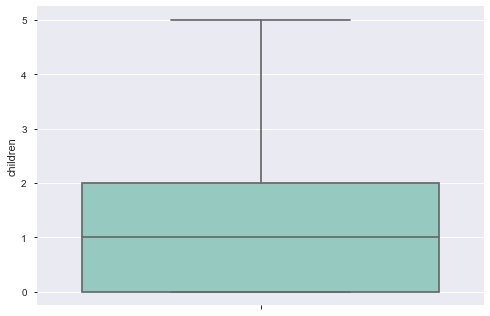

In [29]:
sns.boxplot(x=df['children'], orient="v", palette="Set3")

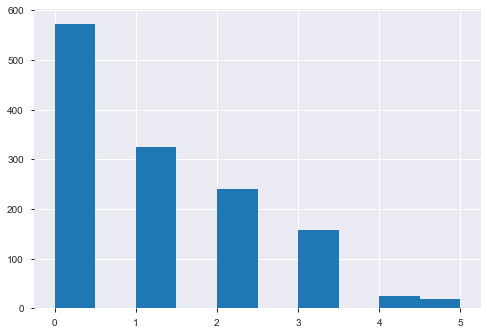

In [30]:
df['children'].hist()

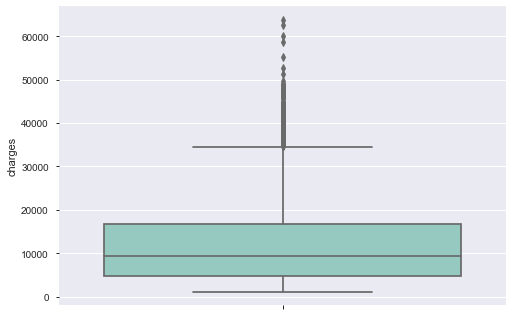

In [31]:
sns.boxplot(x=df['charges'], orient="v", palette="Set3")

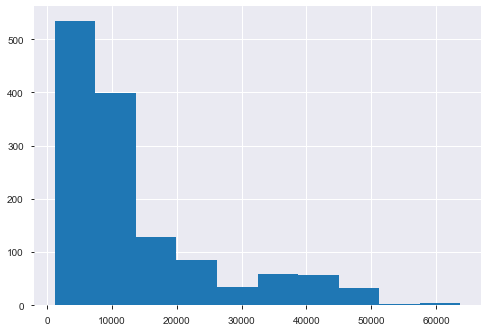

In [32]:
df['charges'].hist()

Outliers are detected in the charges column.  Again, a scatterplot will be used to analyze their distribution.

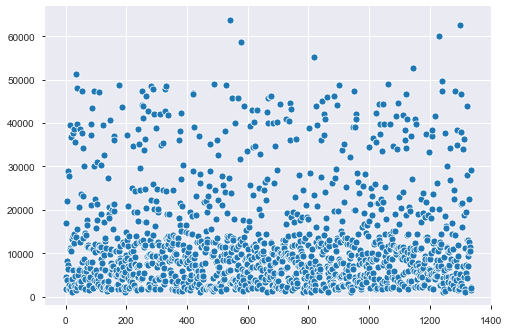

In [33]:
sns.scatterplot(data=df['charges'])

Judging by this distribution, the values over $50,000 dollars appear to be outliers.  A dataframe of those values will be created.

In [34]:
outlier_charges = df[df['charges'] > 50000]
outlier_charges.sort_values('charges', ascending = False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914


Visually it appears that these values are indeed outliers.  Its not clear, however, if removing them is warranted.  I will leave them in.

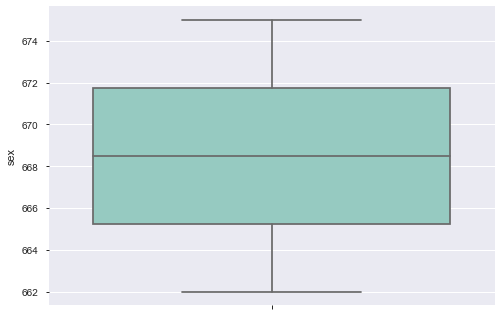

In [35]:
sex_counts = df['sex'].value_counts()
sns.boxplot(x=sex_counts, orient="v", palette="Set3")

male      675
female    662
Name: sex, dtype: int64

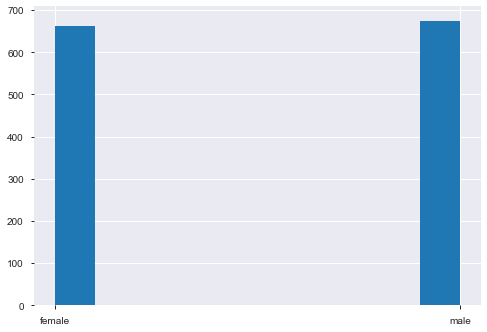

In [36]:
df['sex'].hist()
df['sex'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

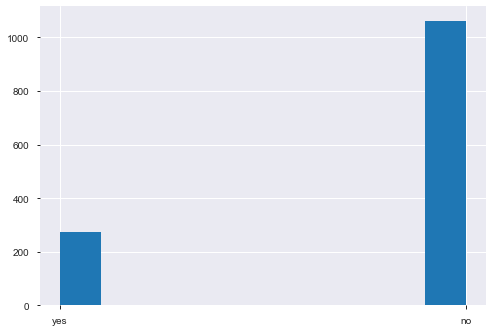

In [37]:
df['smoker'].hist()
df['smoker'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

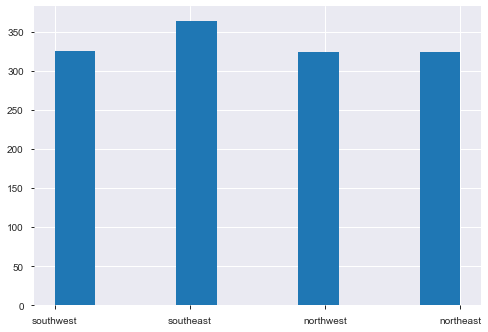

In [38]:
df['region'].hist()
df['region'].value_counts()

#### Correlation Plot
  
  The possible correlations between features will be assessed visually.  
  Code taken from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

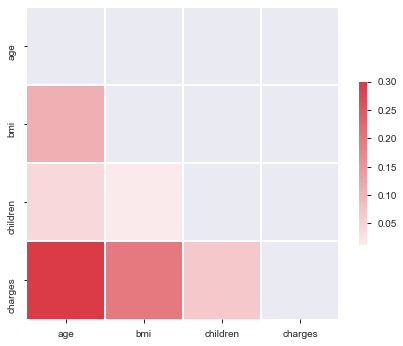

In [39]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Correlations between features in the data are fairly weak.  The highest correlation exists between "age" and "charges" at 0.30.  The next highest is "bmi" and "charges" at 0.20.  

### EDA Pandas Profiling
Additional EDA will be performed using the Pandas Profiling library.  
The library implements numerous automated EDA functions with results presented in an interactive format.  More information on the library can be found here: 
- https://pypi.org/project/pandas-profiling
- https://github.com/pandas-profiling/pandas-profiling
- https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

In [41]:
eda_report = pp.ProfileReport(df_profile)
#eda_report.to_widgets() ...doesnt work... use the HTML implementation -> .to_notebook_iframe()
eda_report.to_notebook_iframe() # HTML implementation

The PhiK correlation provided by Pandas Profiling is very useful.  It natively handles mixed variable types, including categorical, and creates the correlation matrix.  
Looking at the matrix, it is clear that the target variable, 'charges', is positively correlated with "smoker' and 'age'.  Negative correlations exist between 'charges' and the rest of the variables, except for the number of children.  That feature appears not to be correlated with 'charges'.  It is a candidate for removal during feature engineering.  

#### Save cleaned data frame

In [42]:
df.to_csv("df_cleaned.csv", index=False)

### Additional Visualizations
Weight Categories based on the recorded BMI will be determined and added to the data

BMI Categories:  https://www.medic8.com/nutrition/bmi/weight-categories.html
        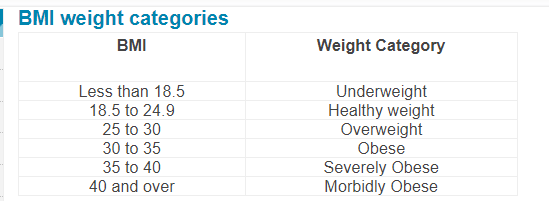

In [64]:
df_weight_cat = df.copy()

# add weight cat to df
cat = []
for bmi in df_weight_cat['bmi']:
    if bmi < 18.5:
        cat.append('Underweight')
    elif bmi >= 18.5 and bmi < 25:
            cat.append('Healthy weight')
    elif bmi >= 25 and bmi <= 30:
            cat.append('Overweight')
    elif bmi > 30 and bmi <= 35:
            cat.append('Obese')
    elif bmi > 35 and bmi <= 40:
            cat.append('Severely Obese')        
    elif bmi > 40: 
        cat.append('Morbidly Obese')


df_weight_cat['weight_cat'] = cat
print(df_weight_cat.head())

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

       weight_cat  
0      Overweight  
1           Obese  
2           Obese  
3  Healthy weight  
4      Overweight  


#### Plot of Age, Charges, BMI, and Weight Category

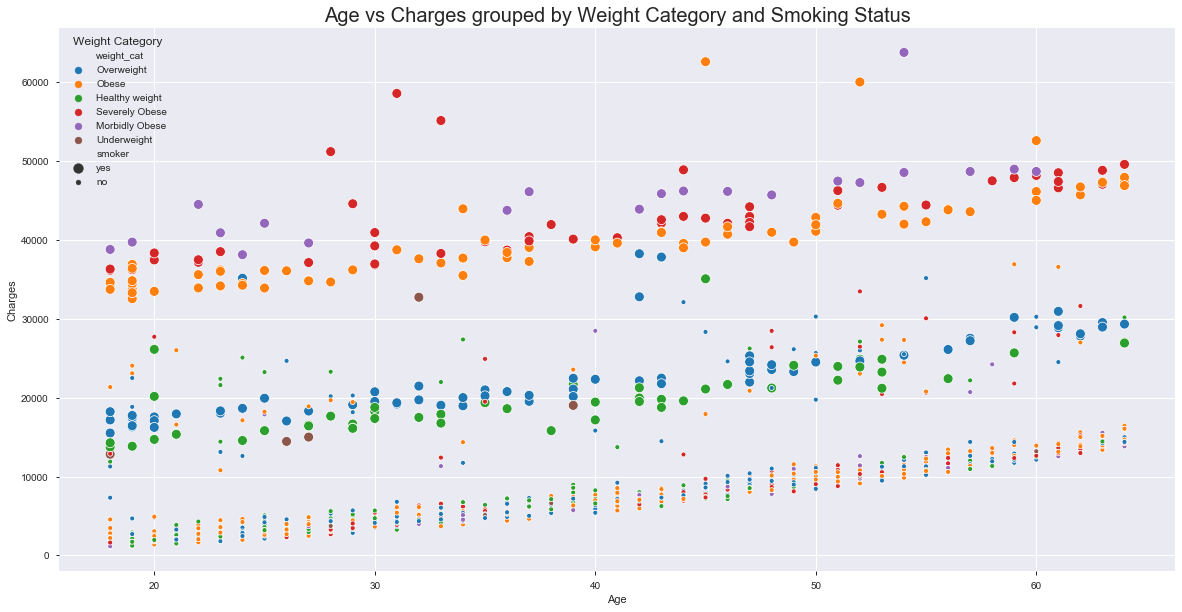

In [112]:
plt.figure(figsize=(20,10))
plt.title('Age vs Charges grouped by Weight Category and Smoking Status', fontsize=20)

ax = sns.scatterplot(x="age", y="charges", 
                hue="weight_cat", # group by weight category
                size = 'smoker', # pointsize by smoker.  Large for smoker, small for non-smoker
                data= df_weight_cat,
                )
plt.legend(loc='best', title='Weight Category', title_fontsize = 'large') # Change title and size of legend.  Best location is chosen

ax.set(xlabel="Age", ylabel= 'Charges')

plt.show()


The distribution of points in the above graph shows several patterns in the data.  
  
  The size of the points indicates the smoking status of the patient with larger points for smokers and smaller points for non-smokers.  With a few exceptions the non-smokers have much lower annual medical charges than smokers in the data set.  A clear band of non-smokers can be found at the lower levels of the graph.  Smokers likewise indicate a clear pattern across the higher levels of the graph indicating the generally higher charges of medical costs associated with smoking.  A band between the high and low bands contains a mix of smokers and non-smokers.  
  
  Colors in the graph indicate the weight category, based on BMI, of the patient.  The higher band is made up almost exclusively of the three "obese" weight categories, however, the lower charges band contains many "obese" patients as well.  The middle charges band is likewise a mix of weight categories with the "Healthy" and "Overweight" categories comprising the majority of points.    
    
Lastly, a slight increase in charges is observed across points as age increases.

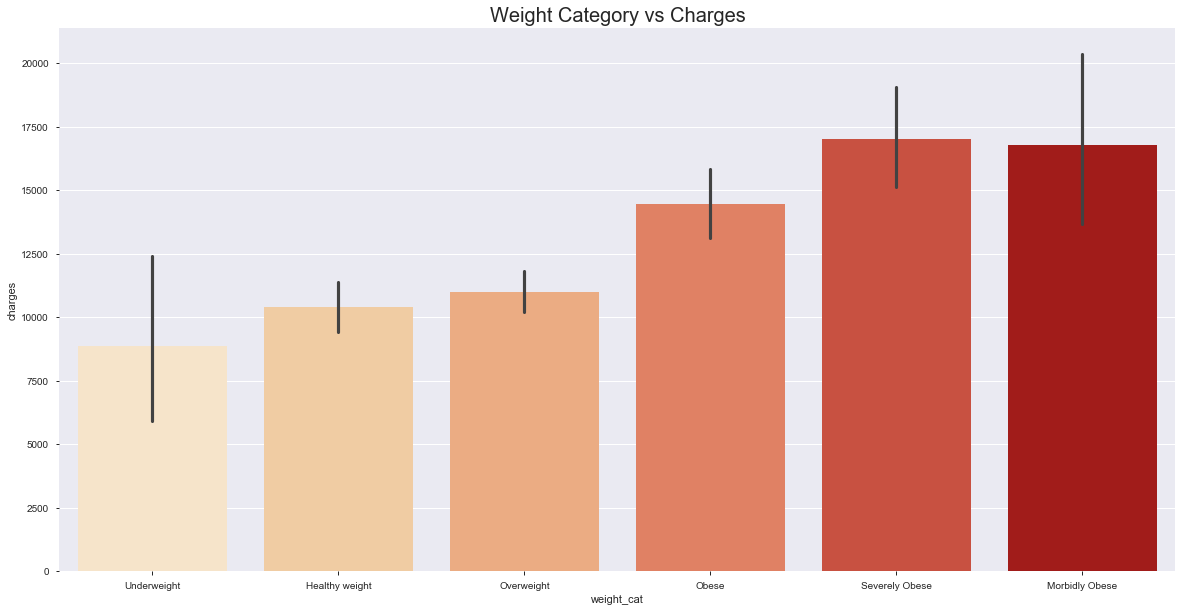

In [106]:
plt.figure(figsize=(20,10))
plt.title('Weight Category vs Charges', fontsize=20)

sns.barplot(x="weight_cat", y="charges", 
                order= ('Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese', 'Morbidly Obese'), # reorder the categories
                data= df_weight_cat,
                palette= "OrRd" # change palette
                )

plt.show()